In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
dataset = 'videogames'

In [10]:
# Load the CSV file into a pandas DataFrame
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'table_%s.csv' % dataset
df = pd.read_csv(file_path)

# Load the CSV file into a pandas DataFrame
# Replace 'your_file.csv' with the path to your CSV file
file_path_rep = 'table_%s_100.csv' % dataset
df_rep = pd.read_csv(file_path_rep)

To plot the coefficient of variation (CV) with error bars based on the bootstrapped replicas (rep column), we can calculate the mean and standard deviation of the CV for each scale across the replicas, and then use those to plot the error bars.

In [11]:
# Compute the coefficient of variation (cv) versus scale in the empirical system 
cv = df['stdpat'] / df['meanpat']

# Compute CV for each row
df_rep['cv'] = df_rep['stdpat'] / df_rep['meanpat']

# Group by scale and compute the mean and standard deviation of CV across replicas
cv_stats = df_rep.groupby('scale')['cv'].agg(['mean', 'std']).reset_index()

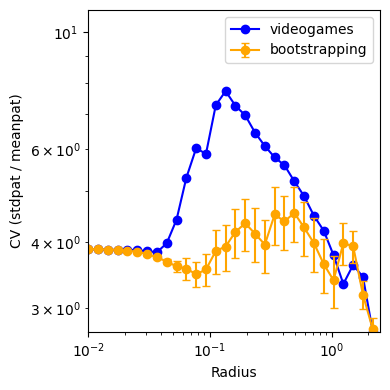

In [80]:
# Plot the mean CV with error bars
plt.figure(figsize=(4, 4))
plt.plot(df['scale'], cv, marker='o', linestyle='-', color='blue', label=dataset)

plt.errorbar(cv_stats['scale'], cv_stats['mean'], yerr=cv_stats['std'], 
             fmt='o', linestyle='-', color='orange', ecolor='orange', capsize=3, label='bootstrapping')
plt.xlabel('Radius')
plt.ylabel('CV (stdpat / meanpat)')
# plt.title('Coefficient of Variation vs Scale with Error Bars')
plt.xscale('log')
plt.yscale('log')
plt.xlim ([0.01,2.5])
plt.ylim ([2.7,11])

plt.legend()
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

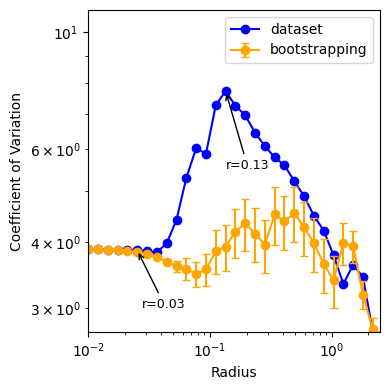

In [111]:

# Assume df, cv, and cv_stats are defined
x1, x2 = 0.025306, 0.134596  # Points to highlight

# Create the plot
plt.figure(figsize=(4, 4))
plt.plot(df['scale'], cv, marker='o', linestyle='-', color='blue', label='dataset')

# Plot mean CV with error bars
plt.errorbar(cv_stats['scale'], cv_stats['mean'], yerr=cv_stats['std'], 
             fmt='o', linestyle='-', color='orange', ecolor='orange', capsize=3, label='bootstrapping')

# Highlight the specified points with arrows
plt.annotate("r=%.02f" % x1, xy=(x1, cv[df['scale'].sub(x1).abs().idxmin()]), 
             xytext=(x1*1.1, 3), arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=9)
plt.annotate("r=%.02f" % x2, xy=(x2, cv[df['scale'].sub(x2).abs().idxmin()]), 
             xytext=(x2*1, 5.5), arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=9)

# Add labels and scales
plt.xlabel('Radius')
plt.ylabel('Coefficient of Variation')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.01, 2.5])
plt.ylim([2.7, 11])

# Add legend and layout
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


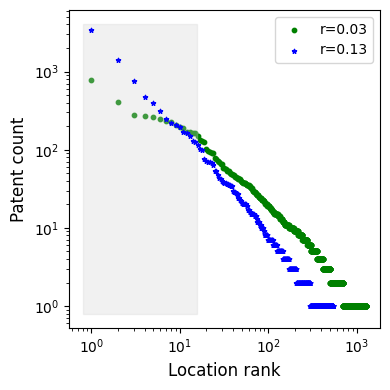

In [110]:
from matplotlib.patches import Rectangle

def plot_zipf (ax, file_path, color, label , marker ):
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])
    ax.scatter(data['x'], data['y'], marker= marker,s=10, color = color, label = label)
    ax.set_xlabel('Location rank', fontsize=12)
    ax.set_ylabel('Patent count', fontsize=12)
    ax.loglog()
    return ax
    
fig, ax = plt.subplots(figsize=(4,4))
plot_zipf (ax, 'cluster_0.025306.csv', 'green', "r=%.02f" % x1, 'o')
ax.add_patch(Rectangle((0.8,0.8), 15, 4000, color ='lightgray', alpha=0.3))
plot_zipf (ax, 'cluster_0.134596.csv', 'blue', "r=%.02f" % x2, '*')
plt.tight_layout()
plt.legend () 
plt.show()

#fig, ax = plt.subplots(figsize=(4, 4))
#plot_zipf (ax, 'cluster_1.037837.csv')
#plt.plot ()